# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [64]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [65]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


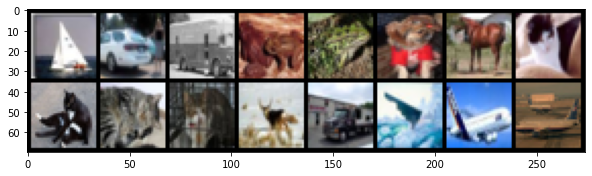

In [66]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

### Fully Connected Layer

In [67]:
# Fully Connected Layer:

class Autoencoder_1(nn.Module):
    def __init__(self):
        super(Autoencoder_1, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Flatten(),
            nn.Linear(3072,2048),
            nn.ReLU(),
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,2048),
            nn.ReLU(),
            nn.Linear(2048,3072),
            nn.Sigmoid(),
            nn.Unflatten(1, (3, 32, 32))
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [68]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder_1().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [69]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=2048, bias=True)
  (2): ReLU()
  (3): Linear(in_features=2048, out_features=1024, bias=True)
  (4): ReLU()
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU()
  (7): Linear(in_features=512, out_features=256, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=256, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=2048, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2048, out_features=3072, bias=True)
  (7): Sigmoid()
  (8): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



In [70]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_1.pt")

[1,  2000] loss: 0.037
[2,  2000] loss: 0.030
[3,  2000] loss: 0.026
[4,  2000] loss: 0.024
[5,  2000] loss: 0.023
[6,  2000] loss: 0.022
[7,  2000] loss: 0.021
[8,  2000] loss: 0.021
[9,  2000] loss: 0.021
[10,  2000] loss: 0.021
Finished Training
Saving Model...


In [73]:
autoencoder.load_state_dict(torch.load("/content/autoencoder_1.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


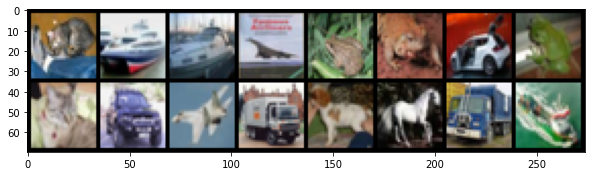

Reconstructed image


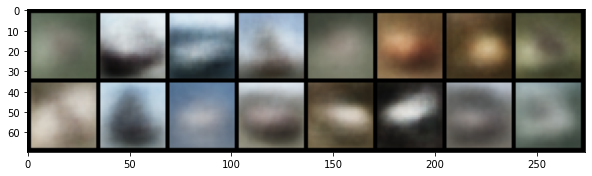

In [74]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

### Combination of convolution layers + fully connected layers

In [83]:
# Combination of convolution layers + fully connected layers

class Autoencoder_2(nn.Module):
    def __init__(self):
        super(Autoencoder_2, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Unflatten(1, (16, 8, 8)),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
            
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [84]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder_2().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [85]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU()
  (7): Linear(in_features=512, out_features=256, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=256, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=1024, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(16, 8, 8))
  (5): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): ReLU()
  (7): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (8): Sigmoid()
)



In [86]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_2.pt")

[1,  2000] loss: 0.031
[2,  2000] loss: 0.019
[3,  2000] loss: 0.015
[4,  2000] loss: 0.014
[5,  2000] loss: 0.012
[6,  2000] loss: 0.012
[7,  2000] loss: 0.011
[8,  2000] loss: 0.010
[9,  2000] loss: 0.010
[10,  2000] loss: 0.009
Finished Training
Saving Model...


In [87]:
autoencoder.load_state_dict(torch.load("/content/autoencoder_2.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


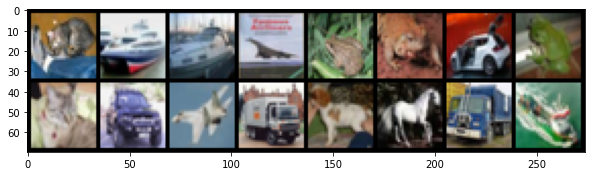

Reconstructed image


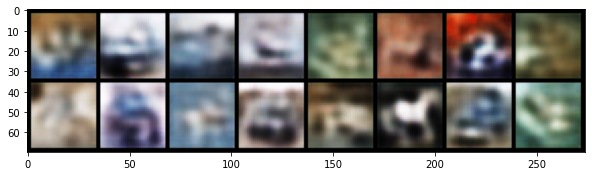

In [88]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

### Fully Convolutional Layer

In [103]:
# Fully Convolution Layer:

class Autoencoder_3(nn.Module):
    def __init__(self):
        super(Autoencoder_3, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 4, stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 2, stride=2,padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 2, stride=2,padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            # Write your code here
            
            nn.ConvTranspose2d(64, 32, 2, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 2, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [104]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder_3().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [105]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): Sigmoid()
)



In [106]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder_3.pt")

[1,  2000] loss: 0.020
[2,  2000] loss: 0.009
[3,  2000] loss: 0.009
[4,  2000] loss: 0.007
[5,  2000] loss: 0.007
[6,  2000] loss: 0.006
[7,  2000] loss: 0.006
[8,  2000] loss: 0.006
[9,  2000] loss: 0.006
[10,  2000] loss: 0.005
Finished Training
Saving Model...


In [97]:
autoencoder.load_state_dict(torch.load("/content/autoencoder_3.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


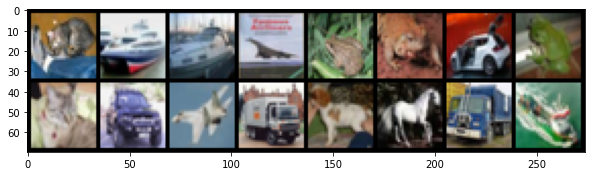

Reconstructed image


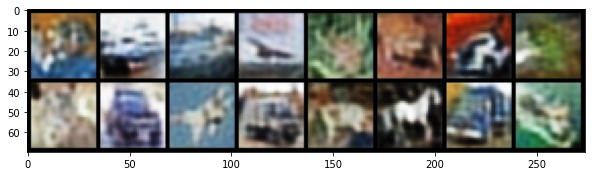

In [98]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 6, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(6, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.013
[2,  2000] loss: 0.005
[3,  2000] loss: 0.004
[4,  2000] loss: 0.004
[5,  2000] loss: 0.004
[6,  2000] loss: 0.003
[7,  2000] loss: 0.003
[8,  2000] loss: 0.003
[9,  2000] loss: 0.003
[10,  2000] loss: 0.003
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


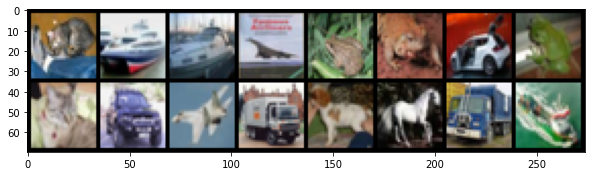

Reconstructed image


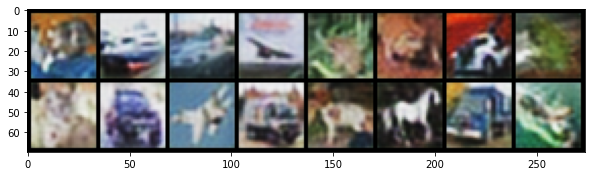

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

**APPLICATIONS OF AUTOENCODERS:**


*   **Dimensionality Reduction:** In auto-encoders, we force the network to learn important features by reducing the the size of hidden layer.
*   **Image Denoising:** Auto encoders are useful to remove the noise from the image and obtain proper information about the content of the image when our image gets corrupted or there is some noise.
*    **Feature Extraction:** Encoding part of Autoencoders helps to learn important hidden features present in the input data, in the process to reduce the reconstruction error.
* **Image Generation:** Variational Autoencoder(VAE) which are Generative Model can be used to generate new characters of animation, or generate fake human images.
* **Sequence-to-Sequence Prediction:** The Encoder-Decoder Model that can capture temporal structure, such as LSTMs-based autoencoders can be used to predict the next frame of a video.
* **Recommendation Systems:** Deep Autoencoders can be used to understand user preferences to recommend movies, books or other items.

</br>

**DIFFERENT TYPES OF AUTOENCODERS**

*   **Undercomplete autoencoders:** Undercomplete autoencoders are simplest and truly unsupervised autoencoders.Undercomplete autoencoder takes in an image and tries to predict the same image as output, thus reconstructing the image from the compressed bottleneck region.
*   **Sparse autoencoders:** Sparse autoencoders are similar to the undercomplete autoencoders however how the encoding of information is regulated is significantly different.While undercomplete autoencoders are regulated and fine-tuned by regulating the size of the bottleneck, the sparse autoencoder is regulated by changing the number of nodes at each hidden layer.
*   **Contractive autoencoders:** The contractive autoencoder also has a regularization term to prevent the network from learning the identity function and mapping input into the output.Contractive autoencoders work on the basis that similar inputs should have similar encodings and a similar latent space representation.
*   **Denoising autoencoders:** Denoising autoencoders, as the name suggests, are autoencoders that remove noise from an image.
*   **Variational Autoencoders:** Standard and variational autoencoders learn to represent the input just in a compressed form called the latent space or the bottleneck.


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

**PCA** simply projects the data into another space by learning a linear transformation with projection vectors specified by the data’s variance while Autoencoders are neural networks that stack numerous non-linear transformations to reduce input into a low-dimensional latent space (layers).
<br>
**PCA VS AUTOENCODERS**


*   PCA is quicker and less expensive to compute than autoencoders.
*   Autoencoder works for both linear and non-linear surfaces, whereas principal component analysis only works for linear surfaces.
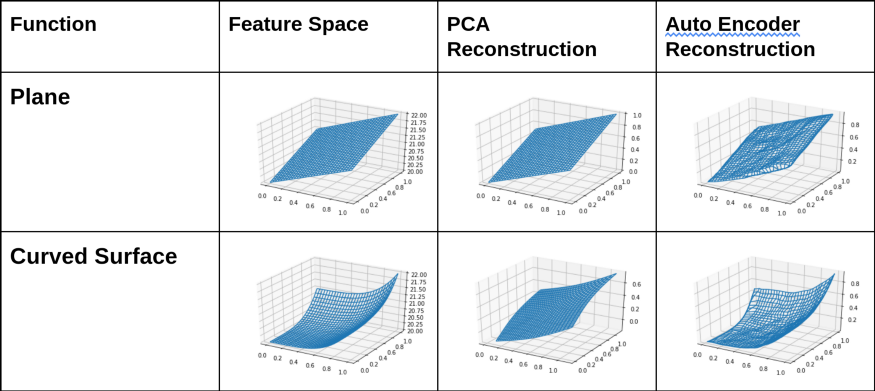
<center>PCA VS Autoencoder on plane and curved surfaces</center>
*   Autoencoders are more prone to get the condition of overfitting of data than PCA, this is because with autoencoder uses backpropagation, that may learn the features to the extent that it works against the idea of the model.

